# Abschlussprojekt Fachunterricht ( 1 ) 
## FI Daten- und Prozessanalyse

## Analyse und Modellierung der Kundendaten

_Geschätzte Bearbeitungszeit 180 Minuten_

### Einleitung
Der Begriff _"Kundenabwanderung"_ (Englisch: _customer churn_) ist eine der wichtigsten Themen bei der Wachstumsuswertung eines wachsenden Unternehmens.  

Es handelt sich dabei nicht unbedingt immer um erfreuliche Nachrichten, sondern Fakten, die einem Unternehmen die harte Wahrheit über seine Kundenbindung liefert.

### Projektziel
Wir werden einen Telekommunikationsdatensatz `ChurnData.csv` für die Vorhersage der Kundenabwanderung verwenden. Dabei handelt es sich um einen Kundendatensatz, bei dem jede Zeile für einen Kunden steht. Die Daten sind relativ leicht zu verstehen, und Sie können daraus Erkenntnisse gewinnen, die Sie sofort nutzen können. In der Regel ist es kostengünstiger, Kunden zu halten, als neue zu gewinnen. Daher liegt der Schwerpunkt dieser Analyse auf der Vorhersage der Kunden, die dem Unternehmen treu bleiben werden.  

Dieser Datensatz liefert Informationen, mit deren Hilfe Sie vorhersagen können, welches Verhalten Ihnen helfen wird, Kunden zu binden. Sie können alle relevanten Kundendaten analysieren und gezielte Kundenbindungsprogramme entwickeln.

### Aufgaben

#### Explorative Datenanalyse
Lesen Sie die Daten aus `ChurnData.csv` ein. Erstellen Sie dann ein Pandas Dataframe und führen Sie zunächst eine allgemeine Analyse durch.  

Der Datensatz enthält Informationen über:

- Kunden, die innerhalb des letzten Monats ausgetreten sind - die Spalte heißt "Churn" (1: verlassen)
- Dienste,wofür sich der Kunde entschieden hat – Telefon, mehrere Leitungen, Internet, Online-Sicherheit, Online-Backup, Geräteschutz, technischer Support, und Streaming TV und Filme
- Informationen zum Kundenkonto - wie lange der Kunde schon Kunde ist, Vertrag, Zahlungsmethode, papierlose Abrechnung, monatliche Gebühren und Gesamtgebühren
- Demografische Informationen über Kunden - Geschlecht, Altersgruppe und ob sie Partner und Angehörige haben


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Daten einlesen, Dataframe erstellen
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
churn_df.info() # allgemeine Informationen zum Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tenure    200 non-null    float64
 1   age       200 non-null    float64
 2   address   200 non-null    float64
 3   income    200 non-null    float64
 4   ed        200 non-null    float64
 5   employ    200 non-null    float64
 6   equip     200 non-null    float64
 7   callcard  200 non-null    float64
 8   wireless  200 non-null    float64
 9   longmon   200 non-null    float64
 10  tollmon   200 non-null    float64
 11  equipmon  200 non-null    float64
 12  cardmon   200 non-null    float64
 13  wiremon   200 non-null    float64
 14  longten   200 non-null    float64
 15  tollten   200 non-null    float64
 16  cardten   200 non-null    float64
 17  voice     200 non-null    float64
 18  pager     200 non-null    float64
 19  internet  200 non-null    float64
 20  callwait  200 non-null    float6

In [4]:
churn_df.describe() # Statistik

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


In [5]:
churn_df.corr().loc['churn'] # Korrelationen zum Target

tenure     -0.376860
age        -0.287697
address    -0.260659
income     -0.090790
ed          0.216112
employ     -0.337969
equip       0.275284
callcard   -0.311451
wireless    0.174356
longmon    -0.292026
tollmon     0.014356
equipmon    0.255348
cardmon    -0.177163
wiremon     0.177483
longten    -0.294906
tollten    -0.059482
cardten    -0.228634
voice       0.142315
pager       0.124623
internet    0.254838
callwait   -0.052885
confer     -0.081361
ebill       0.254838
loglong    -0.336869
logtoll    -0.070156
lninc      -0.117459
custcat     0.014839
churn       1.000000
Name: churn, dtype: float64

In [6]:
cor = churn_df.corr().loc['churn']
cor=cor.to_frame()
cor.reset_index(inplace=True)
cor.rename(columns={'index':'feature'},inplace=True)
cor.drop(27,axis=0,inplace=True)
cor

,feature,churn
0,tenure,-0.376860
1,age,-0.287697
2,address,-0.260659
3,income,-0.090790
4,ed,0.216112
5,employ,-0.337969
6,equip,0.275284
7,callcard,-0.311451
8,wireless,0.174356
9,longmon,-0.292026


### Visualisierung
- Korrelationen
- Anzahl der Kunden in jeder Klasse (churn)

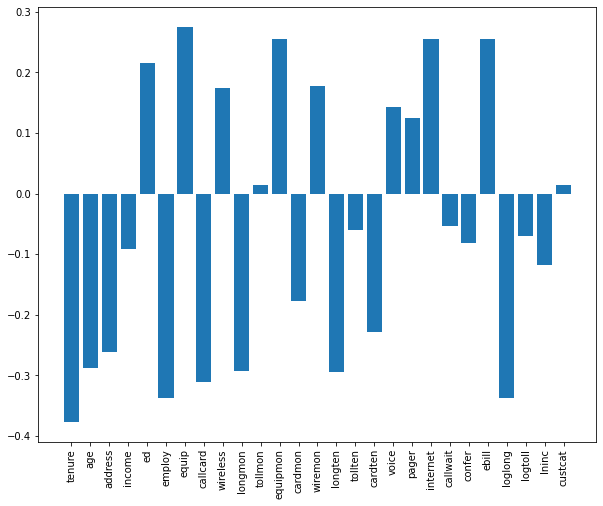

In [7]:
plt.figure(figsize=(10,8))
plt.bar(cor.feature,cor.churn)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
churn_df.churn.value_counts() #insgesamt verliessen uns 58 Kunden aus 200

0.0    142
1.0     58
Name: churn, dtype: int64

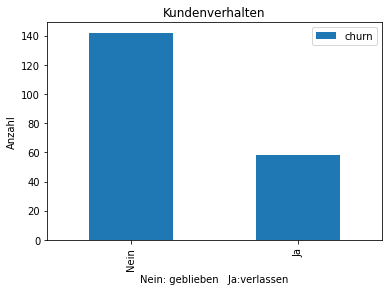

In [9]:
churn_df.churn.value_counts().to_frame().plot(kind='bar')
plt.xticks([0.0,1.0], labels=['Nein','Ja'], rotation='vertical')
plt.title('Kundenverhalten')
plt.xlabel('Nein: geblieben   Ja:verlassen')
plt.ylabel('Anzahl')
plt.show()

#### Datenvorbereitung
In diesem Schritt müssen die Daten für Modellierung vorbereitet werden. Achten Sie dabei darauf, Trainings- und Testingsdaten von einander getrennt zu halten und nicht vergessen, Modelle funktionieren besser mit standardisierten Daten. Sind alle Merkmale für unsere Analyse relevant?

In [10]:
# Feature Selection
# Anhand der Grafik nehmen wir Merkmale mit einem absoluten Wert >= 0.2
cor[cor['churn'].abs()>=0.2]

,feature,churn
0,tenure,-0.376860
1,age,-0.287697
2,address,-0.260659
4,ed,0.216112
5,employ,-0.337969
6,equip,0.275284
7,callcard,-0.311451
9,longmon,-0.292026
11,equipmon,0.255348
14,longten,-0.294906


In [11]:
selected_features=cor[cor['churn'].abs()>=0.2]['feature']
selected_features

0       tenure
1          age
2      address
4           ed
5       employ
6        equip
7     callcard
9      longmon
11    equipmon
14     longten
16     cardten
19    internet
22       ebill
23     loglong
Name: feature, dtype: object

In [12]:
churn_df[selected_features].head()

,tenure,age,address,ed,employ,equip,callcard,longmon,equipmon,longten,cardten,internet,ebill,loglong
0,11.0,33.0,7.0,5.0,5.0,0.0,1.0,4.40,0.0,42.00,125.0,0.0,0.0,1.482
1,33.0,33.0,12.0,2.0,0.0,0.0,0.0,9.45,0.0,288.80,0.0,0.0,0.0,2.246
2,23.0,30.0,9.0,1.0,2.0,0.0,0.0,6.30,0.0,157.05,0.0,0.0,0.0,1.841
3,38.0,35.0,5.0,2.0,10.0,1.0,1.0,6.05,50.1,239.55,880.0,1.0,1.0,1.800
4,7.0,35.0,14.0,2.0,15.0,0.0,1.0,7.10,0.0,47.45,145.0,0.0,0.0,1.960


In [13]:
churn_selection = churn_df[selected_features]
churn_selection['churn'] = churn_df['churn'] # Zielvariable hinzufügen
churn_selection.head()

,tenure,age,address,ed,employ,equip,callcard,longmon,equipmon,longten,cardten,internet,ebill,loglong,churn
0,11.0,33.0,7.0,5.0,5.0,0.0,1.0,4.40,0.0,42.00,125.0,0.0,0.0,1.482,1.0
1,33.0,33.0,12.0,2.0,0.0,0.0,0.0,9.45,0.0,288.80,0.0,0.0,0.0,2.246,1.0
2,23.0,30.0,9.0,1.0,2.0,0.0,0.0,6.30,0.0,157.05,0.0,0.0,0.0,1.841,0.0
3,38.0,35.0,5.0,2.0,10.0,1.0,1.0,6.05,50.1,239.55,880.0,1.0,1.0,1.800,0.0
4,7.0,35.0,14.0,2.0,15.0,0.0,1.0,7.10,0.0,47.45,145.0,0.0,0.0,1.960,0.0


In [14]:
# Daten in Train- und Test-Set aufteilen
from sklearn.model_selection import train_test_split
train, test = train_test_split(churn_selection, # Dataframe mit ausgewählten Features
                               test_size=.2, # Testdaten mit Anteil 20%
                               random_state=42)

In [15]:
# Train- und Testdaten als Datei speichern
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [16]:
# Trainingsdaten einlesen und aufspalten
train_df=pd.read_csv('train.csv')

In [17]:
X=train_df.drop('churn',axis=1)
X.head()

,tenure,age,address,ed,employ,equip,callcard,longmon,equipmon,longten,cardten,internet,ebill,loglong
0,45.0,30.0,0.0,5.0,4.0,1.0,1.0,7.10,39.75,314.80,775.0,1.0,1.0,1.960
1,6.0,32.0,10.0,1.0,10.0,0.0,1.0,3.85,0.00,29.90,80.0,0.0,0.0,1.348
2,46.0,42.0,9.0,4.0,7.0,0.0,1.0,14.25,0.00,611.65,985.0,0.0,0.0,2.657
3,53.0,22.0,1.0,4.0,0.0,1.0,1.0,12.05,27.15,666.00,335.0,1.0,1.0,2.489
4,24.0,35.0,10.0,5.0,6.0,1.0,0.0,3.30,30.30,88.65,0.0,1.0,1.0,1.194


In [18]:
y=train_df['churn']
y[:5]

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: churn, dtype: float64

In [19]:
# Daten standardisieren
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler() # Scaler für Features erstellen
feature_scaler = feature_scaler.fit(X)
X = feature_scaler.transform(X)
X[0:5]

array([[ 0.4407642 , -0.83397365, -1.15880079,  1.65653017, -0.66538893,
         1.16316   ,  0.64492573, -0.47345864,  1.19466268, -0.34891901,
         0.19907175,  1.1055416 ,  1.11960758, -0.31468089],
       [-1.38672325, -0.67445688, -0.07008601, -1.41645334, -0.00821468,
        -0.85972695,  0.64492573, -0.81025549, -0.80524642, -0.74554515,
        -0.66845035, -0.90453403, -0.89317009, -1.15745625],
       [ 0.48762285,  0.12312701, -0.17895749,  0.8882843 , -0.3368018 ,
        -0.85972695,  0.64492573,  0.26749442, -0.80524642,  0.06434342,
         0.46120072, -0.90453403, -0.89317009,  0.6451466 ],
       [ 0.81563342, -1.47204077, -1.04992932,  0.8882843 , -1.10350509,
         1.16316   ,  0.64492573,  0.03950886,  0.56072923,  0.14000727,
        -0.35015088,  1.1055416 ,  1.11960758,  0.4137965 ],
       [-0.5432675 , -0.43518171, -0.07008601,  1.65653017, -0.44633084,
         1.16316   , -1.55056613, -0.86725188,  0.71921259, -0.6637558 ,
        -0.76830901,  1.10

In [20]:
# Daten in Train- und Validierungs-Set aufteilen
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Validation set:', X_val.shape,  y_val.shape)

Train set: (128, 14) (128,)
Validation set: (32, 14) (32,)


#### Datenmodellierung
Im letzten Schritt wollen wir ein  Modell erstellen, trainieren und testen. Das Modell soll in der Lage sein, voraussagen zu können, ob ein Kunde die Firma verlassen würde - oder nicht. Die Leistung des Modells soll anhand angemessene Maßzahlen (metrics) ausgewertet werden. Nicht vergessen, am Ende das Modell anhand Testdaten zu testen.  

_Gerne dürfen Sie mehrere Modelle ausprobieren und das beste Modell auszuwählen._

In [21]:
# Modell erstellen und trainieren
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear') # Modell erstellen
LR.fit(X_train,y_train) # Modell trainieren

LogisticRegression(C=0.01, solver='liblinear')

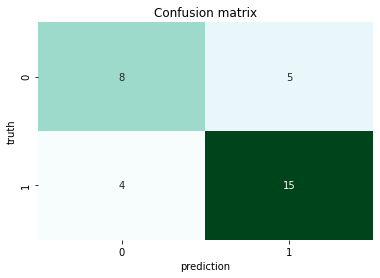

In [22]:
# Modell auswerten: confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
y_pred=LR.predict(X_val)
cm=confusion_matrix(y_val, y_pred, labels=[1,0])
sns.heatmap(cm,annot=True,fmt='d',cbar=False,cmap='BuGn')
plt.xlabel('prediction')
plt.ylabel('truth')
plt.title('Confusion matrix')
plt.show()

In [23]:
rep1=classification_report(y_val,y_pred)
print('Validation Performance')
print(rep1)

Validation Performance
              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77        19
         1.0       0.67      0.62      0.64        13

    accuracy                           0.72        32
   macro avg       0.71      0.70      0.70        32
weighted avg       0.72      0.72      0.72        32



Das Modell anhand Testdaten testen

In [24]:
test_df=pd.read_csv('test.csv')
X_test=test_df.drop('churn',axis=1)
X_test=feature_scaler.transform(X_test)
y_pred_test=LR.predict(X_test)
y_test=test_df['churn']
rep2=classification_report(y_test,y_pred_test)
print('LR Modells performance in Testset')
print(rep2)

LR Modells performance in Testset
              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83        31
         1.0       0.46      0.67      0.55         9

    accuracy                           0.75        40
   macro avg       0.68      0.72      0.69        40
weighted avg       0.79      0.75      0.76        40



In [25]:
# Ein ähnliches Modell mit unterschiedlichen Parametern
LR2 = LogisticRegression(C=0.01, solver='sag')
LR2.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='sag')

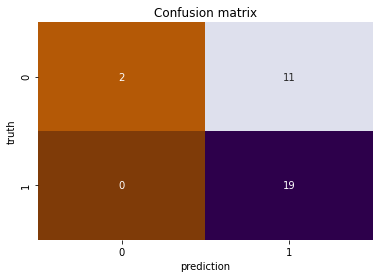

In [26]:
y_pred=LR2.predict(X_val)
cm=confusion_matrix(y_val, y_pred, labels=[1,0])
sns.heatmap(cm,annot=True,fmt='d',cbar=False,cmap='PuOr')
plt.xlabel('prediction')
plt.ylabel('truth')
plt.title('Confusion matrix')
plt.show()

In [27]:
rep=classification_report(y_val,y_pred)
print('LR2 Validation Performance')
print(rep)

LR2 Validation Performance
              precision    recall  f1-score   support

         0.0       0.63      1.00      0.78        19
         1.0       1.00      0.15      0.27        13

    accuracy                           0.66        32
   macro avg       0.82      0.58      0.52        32
weighted avg       0.78      0.66      0.57        32



Das Modell anhand Testdaten testen

In [28]:
y_pred_test=LR2.predict(X_test)
rep=classification_report(y_test,y_pred_test)
print('LR2-Modell performance in Testset')
print(rep)

LR2-Modell performance in Testset
              precision    recall  f1-score   support

         0.0       0.79      1.00      0.89        31
         1.0       1.00      0.11      0.20         9

    accuracy                           0.80        40
   macro avg       0.90      0.56      0.54        40
weighted avg       0.84      0.80      0.73        40



Anscheinend hat das erste Modell eine bessere Leistung.

Wir probieren ein weiteres Modell `GradientBoostingClassifier` in Kombination mit Hauptkomponentenanalyse.

In [29]:
# Haupkomponentenanalyse
from sklearn.decomposition import PCA

# Feature selection
pca=PCA(n_components=7) # Features reduzieren auf 7
pca=pca.fit(train_df.drop('churn',axis=1))
X_pca=pca.transform(train_df.drop('churn',axis=1))


In [30]:
# pca Modell als Datei exportieren
import joblib
joblib.dump(pca,'pca.pkl')

['pca.pkl']

In [31]:
# Daten aufsplitten
X_train_pca, X_val_pca, y_train_pca, y_val_pca= train_test_split(X_pca, 
                                                                    y, 
                                                                    test_size=0.2, 
                                                                    random_state=42)


In [32]:
X_train_pca[:3]

array([[-6.95219686e+02, -8.29051992e+01, -1.75381651e+01,
         6.33918620e+00,  1.51507880e+01, -4.34675561e+00,
        -6.88403537e+00],
       [-7.12901695e+02,  1.17723286e+02,  1.01157046e+01,
         5.59743560e+00,  9.49296500e+00,  4.25533778e+00,
        -3.39306403e+00],
       [ 3.09507296e+02, -2.07026196e+02, -1.70545595e+01,
        -6.29738371e-01, -7.66941627e+00,  3.56416041e+00,
         4.04786467e+00]])

In [33]:
# Zielvariable
y=train_df['churn']
y[:3]



0    1.0
1    0.0
2    0.0
Name: churn, dtype: float64

In [34]:
y_train_pca[:3]

60     0.0
115    0.0
2      0.0
Name: churn, dtype: float64

In [35]:
# Datenmodellierung
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train_pca, y_train_pca)

GradientBoostingClassifier()

In [36]:
print('Train score:',GBC.score(X_train_pca,y_train_pca))
print('Validation score:',GBC.score(X_val_pca,y_val_pca))

Train score: 1.0
Validation score: 0.6875


Das Modell scheint leicht übertrainiert zu sein.

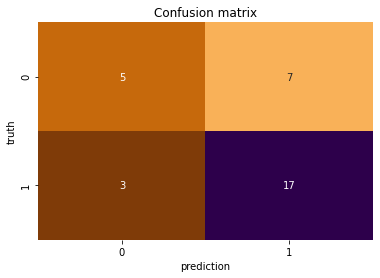

In [37]:
y_pred_pca=GBC.predict(X_val_pca)
cm=confusion_matrix(y_val_pca, y_pred_pca, labels=[1,0])
sns.heatmap(cm,annot=True,fmt='d',cbar=False,cmap='PuOr')
plt.xlabel('prediction')
plt.ylabel('truth')
plt.title('Confusion matrix')
plt.show()

Das Modell anhand Testdaten testen

In [38]:
test_df.shape

(40, 15)

In [39]:
X_test = test_df.drop('churn',axis=1)
# pca laden
loaded_pca=joblib.load('pca.pkl')
X_test=loaded_pca.transform(X_test)
y_pred_test=GBC.predict(X_test)
rep3=classification_report(y_test,y_pred_test)
print('GBC-Modell performance in Testset')
print(rep3)

GBC-Modell performance in Testset
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.81        31
         1.0       0.43      0.67      0.52         9

    accuracy                           0.73        40
   macro avg       0.66      0.70      0.66        40
weighted avg       0.78      0.72      0.74        40



Das aller erste Modell (LogisticRegression) weist hier die beste Performace auf. Daher speichern wir es:

In [40]:
print(rep1,rep2,rep3,sep='\n')

              precision    recall  f1-score   support

         0.0       0.75      0.79      0.77        19
         1.0       0.67      0.62      0.64        13

    accuracy                           0.72        32
   macro avg       0.71      0.70      0.70        32
weighted avg       0.72      0.72      0.72        32

              precision    recall  f1-score   support

         0.0       0.89      0.77      0.83        31
         1.0       0.46      0.67      0.55         9

    accuracy                           0.75        40
   macro avg       0.68      0.72      0.69        40
weighted avg       0.79      0.75      0.76        40

              precision    recall  f1-score   support

         0.0       0.88      0.74      0.81        31
         1.0       0.43      0.67      0.52         9

    accuracy                           0.73        40
   macro avg       0.66      0.70      0.66        40
weighted avg       0.78      0.72      0.74        40



In [41]:
# Das Modell (LR2) mit der besten Leistung kann als Datei exportiert werden
import joblib
joblib.dump(LR2,'churn_model.h5')

['churn_model.h5']

In [42]:
# Anmerkungen
# Der Datensatz ist nicht balanziert - Klasse 0 ist viel kleiner als Klasse 1
# Insgesamt ist der Datensatz nicht groß - wenige Daten
# Noch weitere Modelle (wie z.B. KNN) können leichte Verbesserungen bringen